In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df1=pd.DataFrame(data=df)

In [7]:
print("My Original DataFrame")
print(df1)

My Original DataFrame
    Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   

In [8]:
df1 = df1[['Taxable.Income','Marital.Status','Undergrad','City.Population','Work.Experience','Urban']]

In [9]:
df1

,Taxable.Income,Marital.Status,Undergrad,City.Population,Work.Experience,Urban
0,68833,Single,NO,50047,10,YES
1,33700,Divorced,YES,134075,18,YES
2,36925,Married,NO,160205,30,YES
3,50190,Single,YES,193264,15,YES
4,81002,Married,NO,27533,28,NO
...,...,...,...,...,...,...
595,76340,Divorced,YES,39492,7,YES
596,69967,Divorced,YES,55369,2,YES
597,47334,Divorced,NO,154058,0,YES
598,98592,Married,YES,180083,17,NO


In [10]:
fc1=df1.rename({'Marital.Status':'MS','Taxable.Income':'TI','City.Population':'CP','Work.Experience':'WE'},axis=1)
fc1

,TI,MS,Undergrad,CP,WE,Urban
0,68833,Single,NO,50047,10,YES
1,33700,Divorced,YES,134075,18,YES
2,36925,Married,NO,160205,30,YES
3,50190,Single,YES,193264,15,YES
4,81002,Married,NO,27533,28,NO
...,...,...,...,...,...,...
595,76340,Divorced,YES,39492,7,YES
596,69967,Divorced,YES,55369,2,YES
597,47334,Divorced,NO,154058,0,YES
598,98592,Married,YES,180083,17,NO


In [11]:
fc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TI         600 non-null    int64 
 1   MS         600 non-null    object
 2   Undergrad  600 non-null    object
 3   CP         600 non-null    int64 
 4   WE         600 non-null    int64 
 5   Urban      600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [12]:
fc1.describe()

,TI,CP,WE
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [13]:
fclabel=fc1.copy()

In [14]:
fclabel

,TI,MS,Undergrad,CP,WE,Urban
0,68833,Single,NO,50047,10,YES
1,33700,Divorced,YES,134075,18,YES
2,36925,Married,NO,160205,30,YES
3,50190,Single,YES,193264,15,YES
4,81002,Married,NO,27533,28,NO
...,...,...,...,...,...,...
595,76340,Divorced,YES,39492,7,YES
596,69967,Divorced,YES,55369,2,YES
597,47334,Divorced,NO,154058,0,YES
598,98592,Married,YES,180083,17,NO


In [15]:
fclabel.MS.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [16]:
fclabel.Undergrad.unique()

array(['NO', 'YES'], dtype=object)

In [17]:
fclabel.Urban.unique()

array(['YES', 'NO'], dtype=object)

In [18]:
fclabel['MS'].replace(['Single','Divorced','Married'],[0,0,1],inplace=True)
fclabel['Undergrad'].replace(['NO','YES'],[0,1],inplace=True)
fclabel['Urban'].replace(['YES','NO'],[1,0],inplace=True)

In [19]:
fclabel

,TI,MS,Undergrad,CP,WE,Urban
0,68833,0,0,50047,10,1
1,33700,0,1,134075,18,1
2,36925,1,0,160205,30,1
3,50190,0,1,193264,15,1
4,81002,1,0,27533,28,0
...,...,...,...,...,...,...
595,76340,0,1,39492,7,1
596,69967,0,1,55369,2,1
597,47334,0,0,154058,0,1
598,98592,1,1,180083,17,0


In [20]:
def TI(data):
    data.loc[data['TI']<=30000,'TI']=0       #risky=0, good = 1
    data.loc[data['TI']>30000,'TI']=1
    return data
TI(fclabel);

In [21]:
fclabel

,TI,MS,Undergrad,CP,WE,Urban
0,1,0,0,50047,10,1
1,1,0,1,134075,18,1
2,1,1,0,160205,30,1
3,1,0,1,193264,15,1
4,1,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,1,0,0,154058,0,1
598,1,1,1,180083,17,0


In [22]:
fclabel.TI.value_counts()

1    476
0    124
Name: TI, dtype: int64

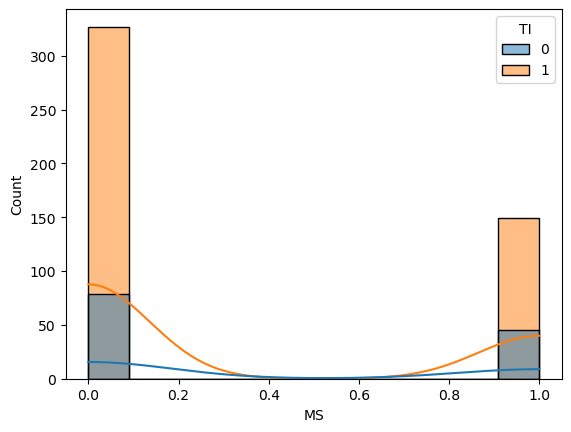

In [23]:
sns.histplot(x='MS', data=fclabel, kde=True, hue='TI');

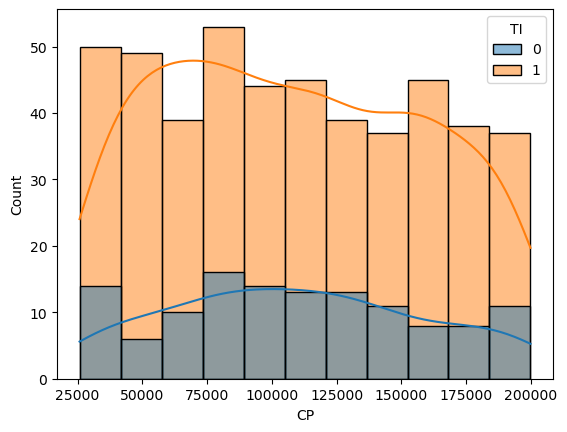

In [24]:
sns.histplot(x='CP', data=fclabel, kde=True, hue='TI');

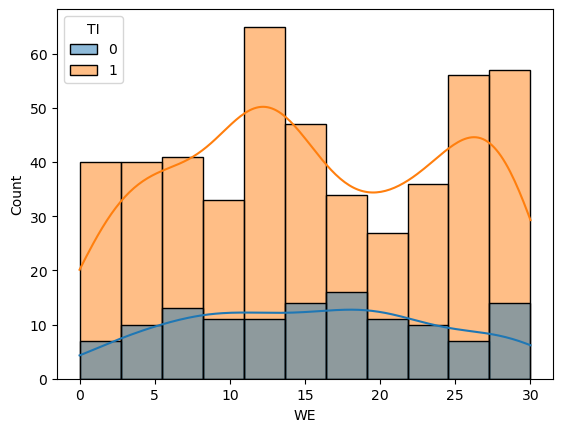

In [25]:
sns.histplot(x='WE', data=fclabel, kde=True, hue='TI');

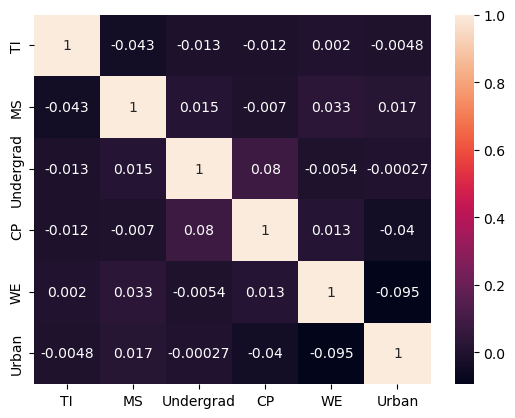

In [26]:
sns.heatmap(fclabel.corr(),annot=True);

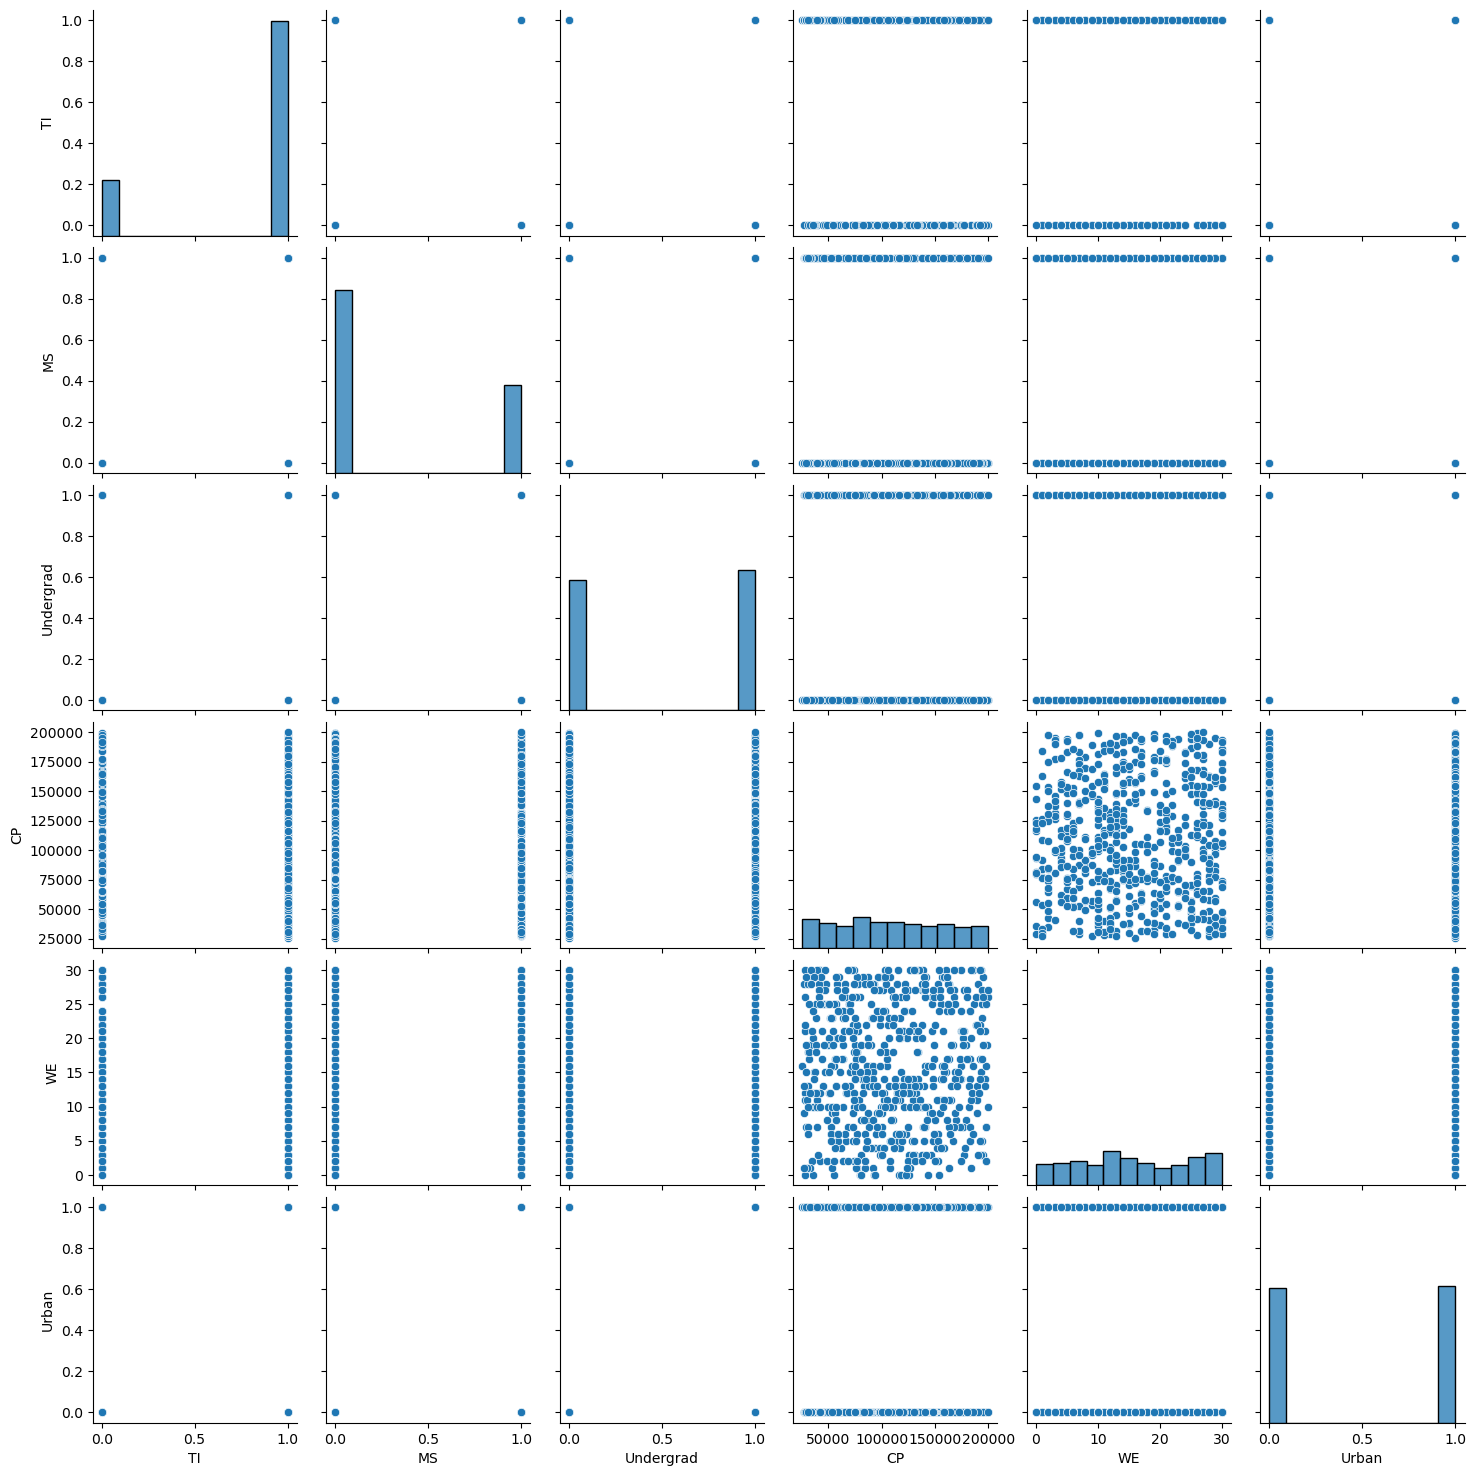

In [27]:
sns.pairplot(fclabel)

In [28]:
x=fclabel.iloc[:,1:]
y=fclabel.iloc[:,0]

In [29]:
x

,MS,Undergrad,CP,WE,Urban
0,0,0,50047,10,1
1,0,1,134075,18,1
2,1,0,160205,30,1
3,0,1,193264,15,1
4,1,0,27533,28,0
...,...,...,...,...,...
595,0,1,39492,7,1
596,0,1,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TI, Length: 600, dtype: int64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [32]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(420, 5) (180, 5) (420,) (180,)


In [33]:
#####Building Decision Tree classifier using Entropy criteria

In [34]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

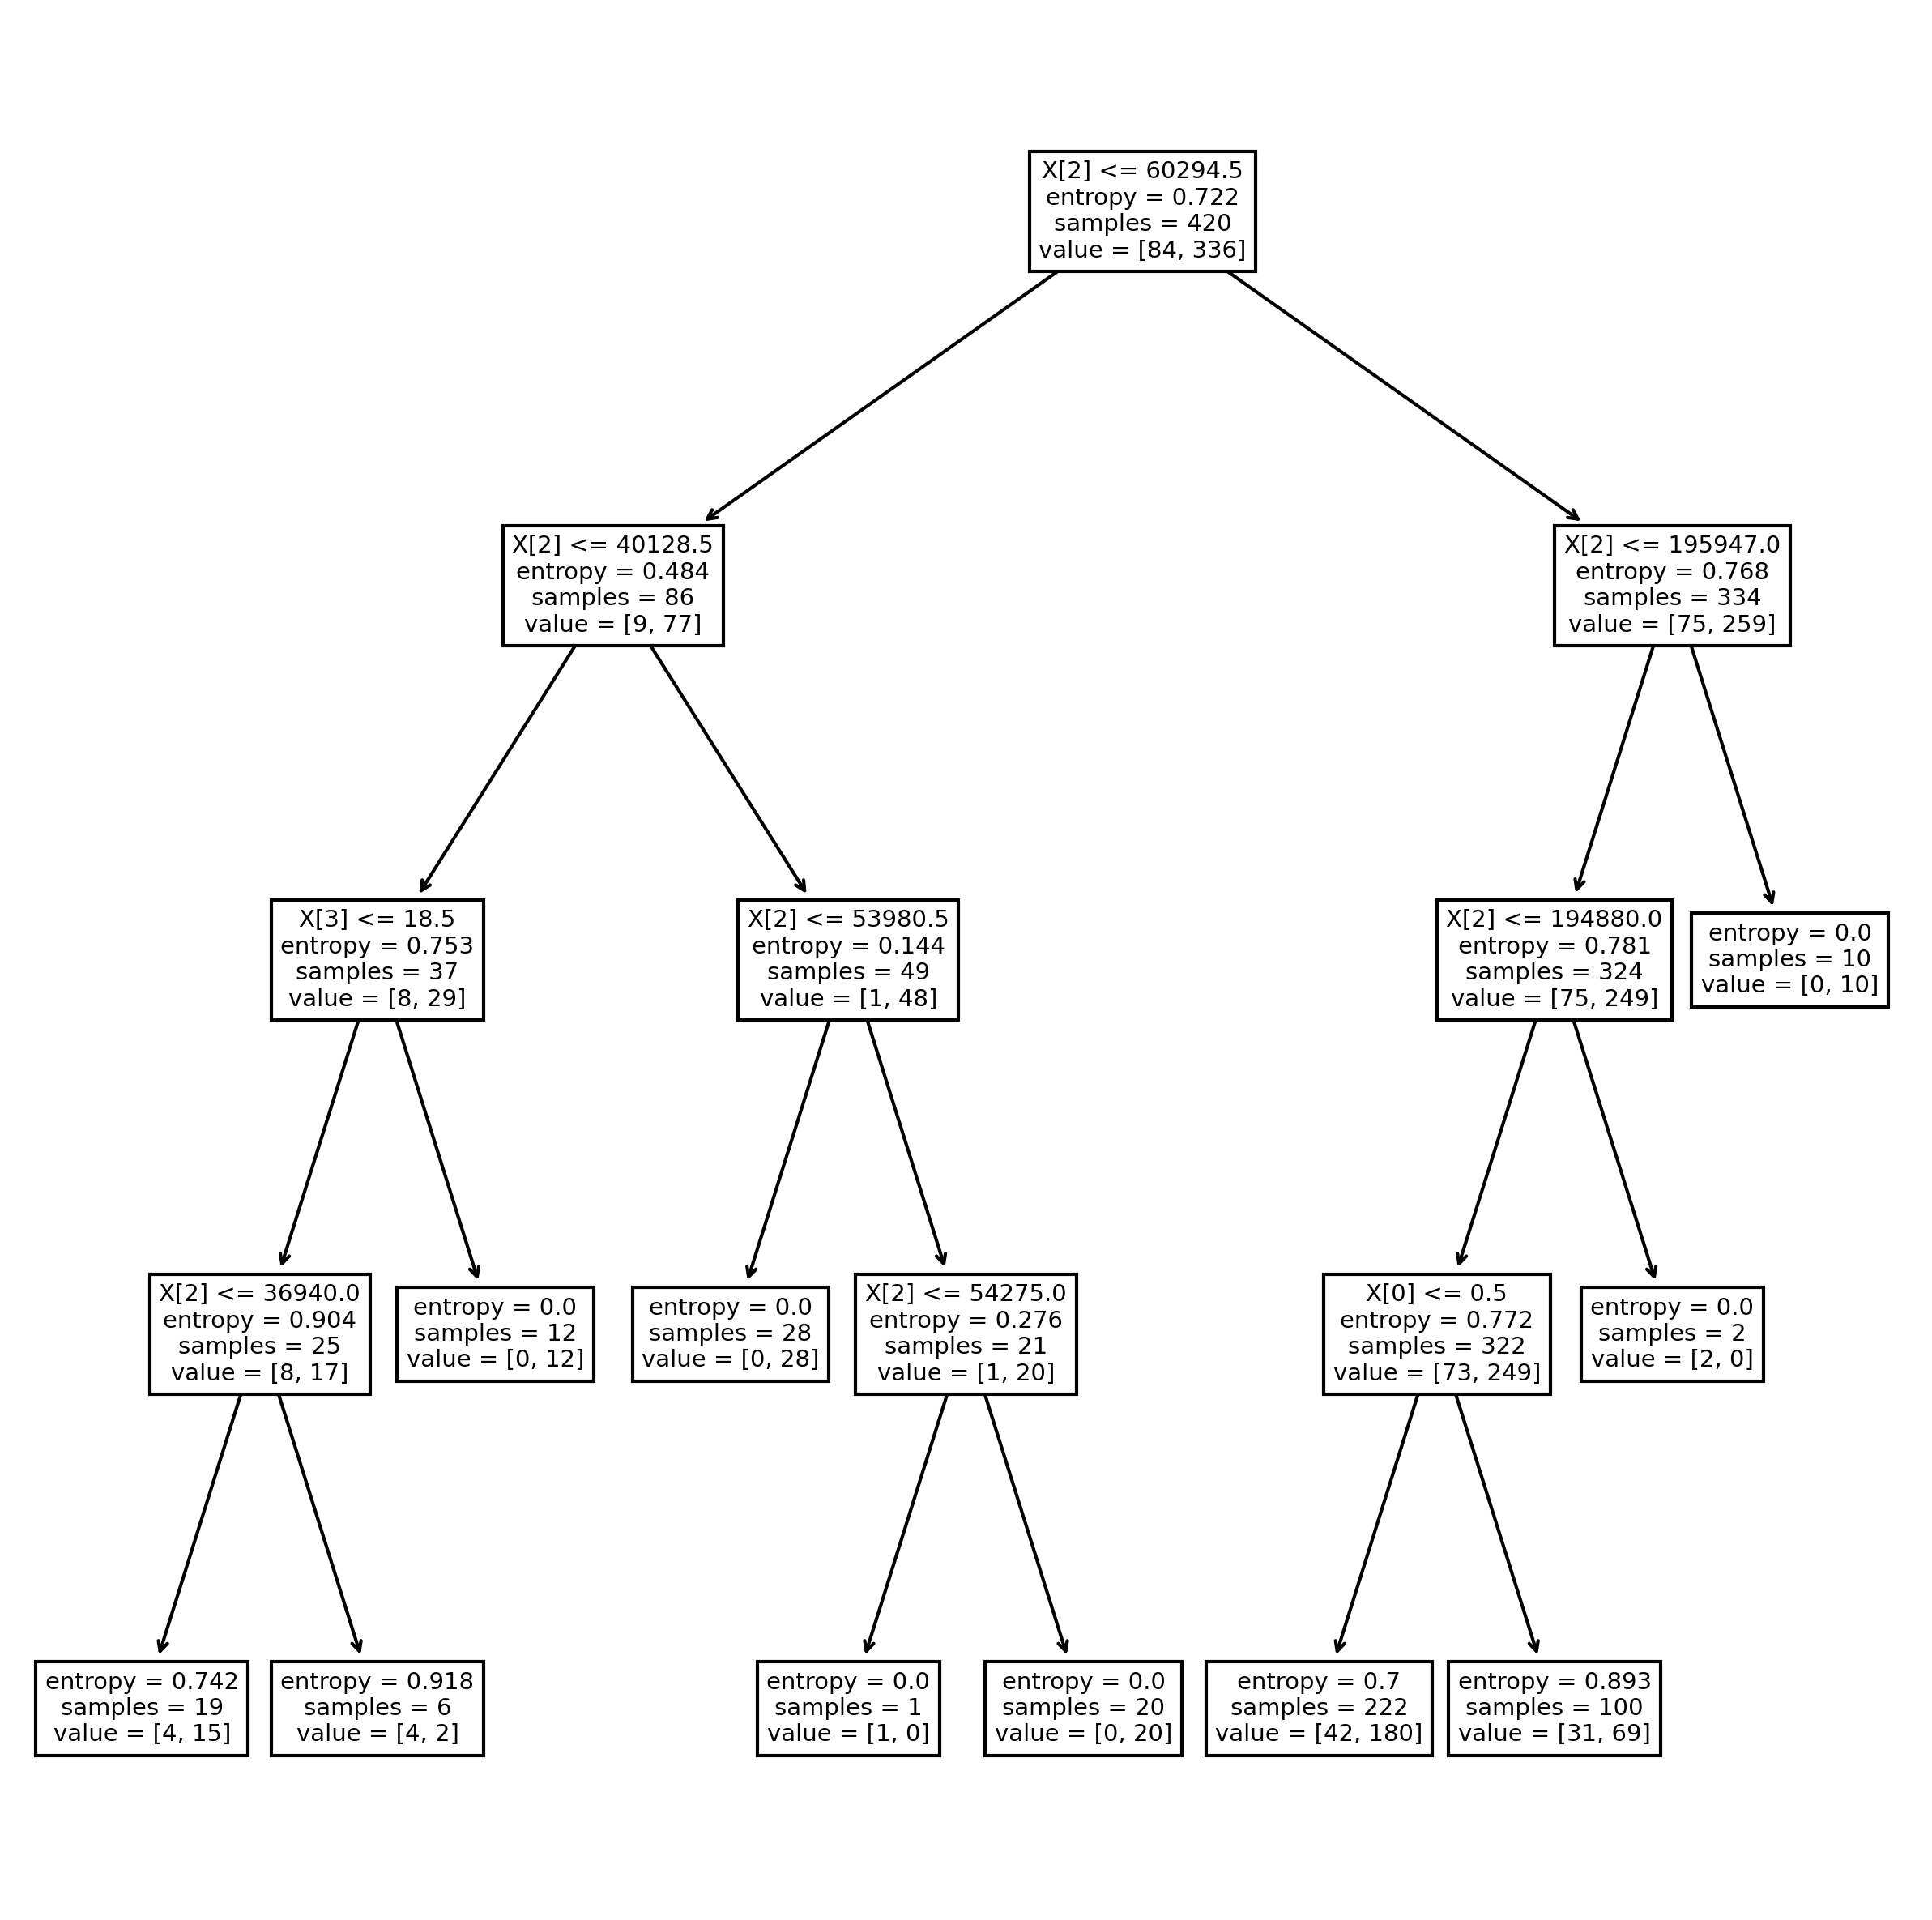

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model);

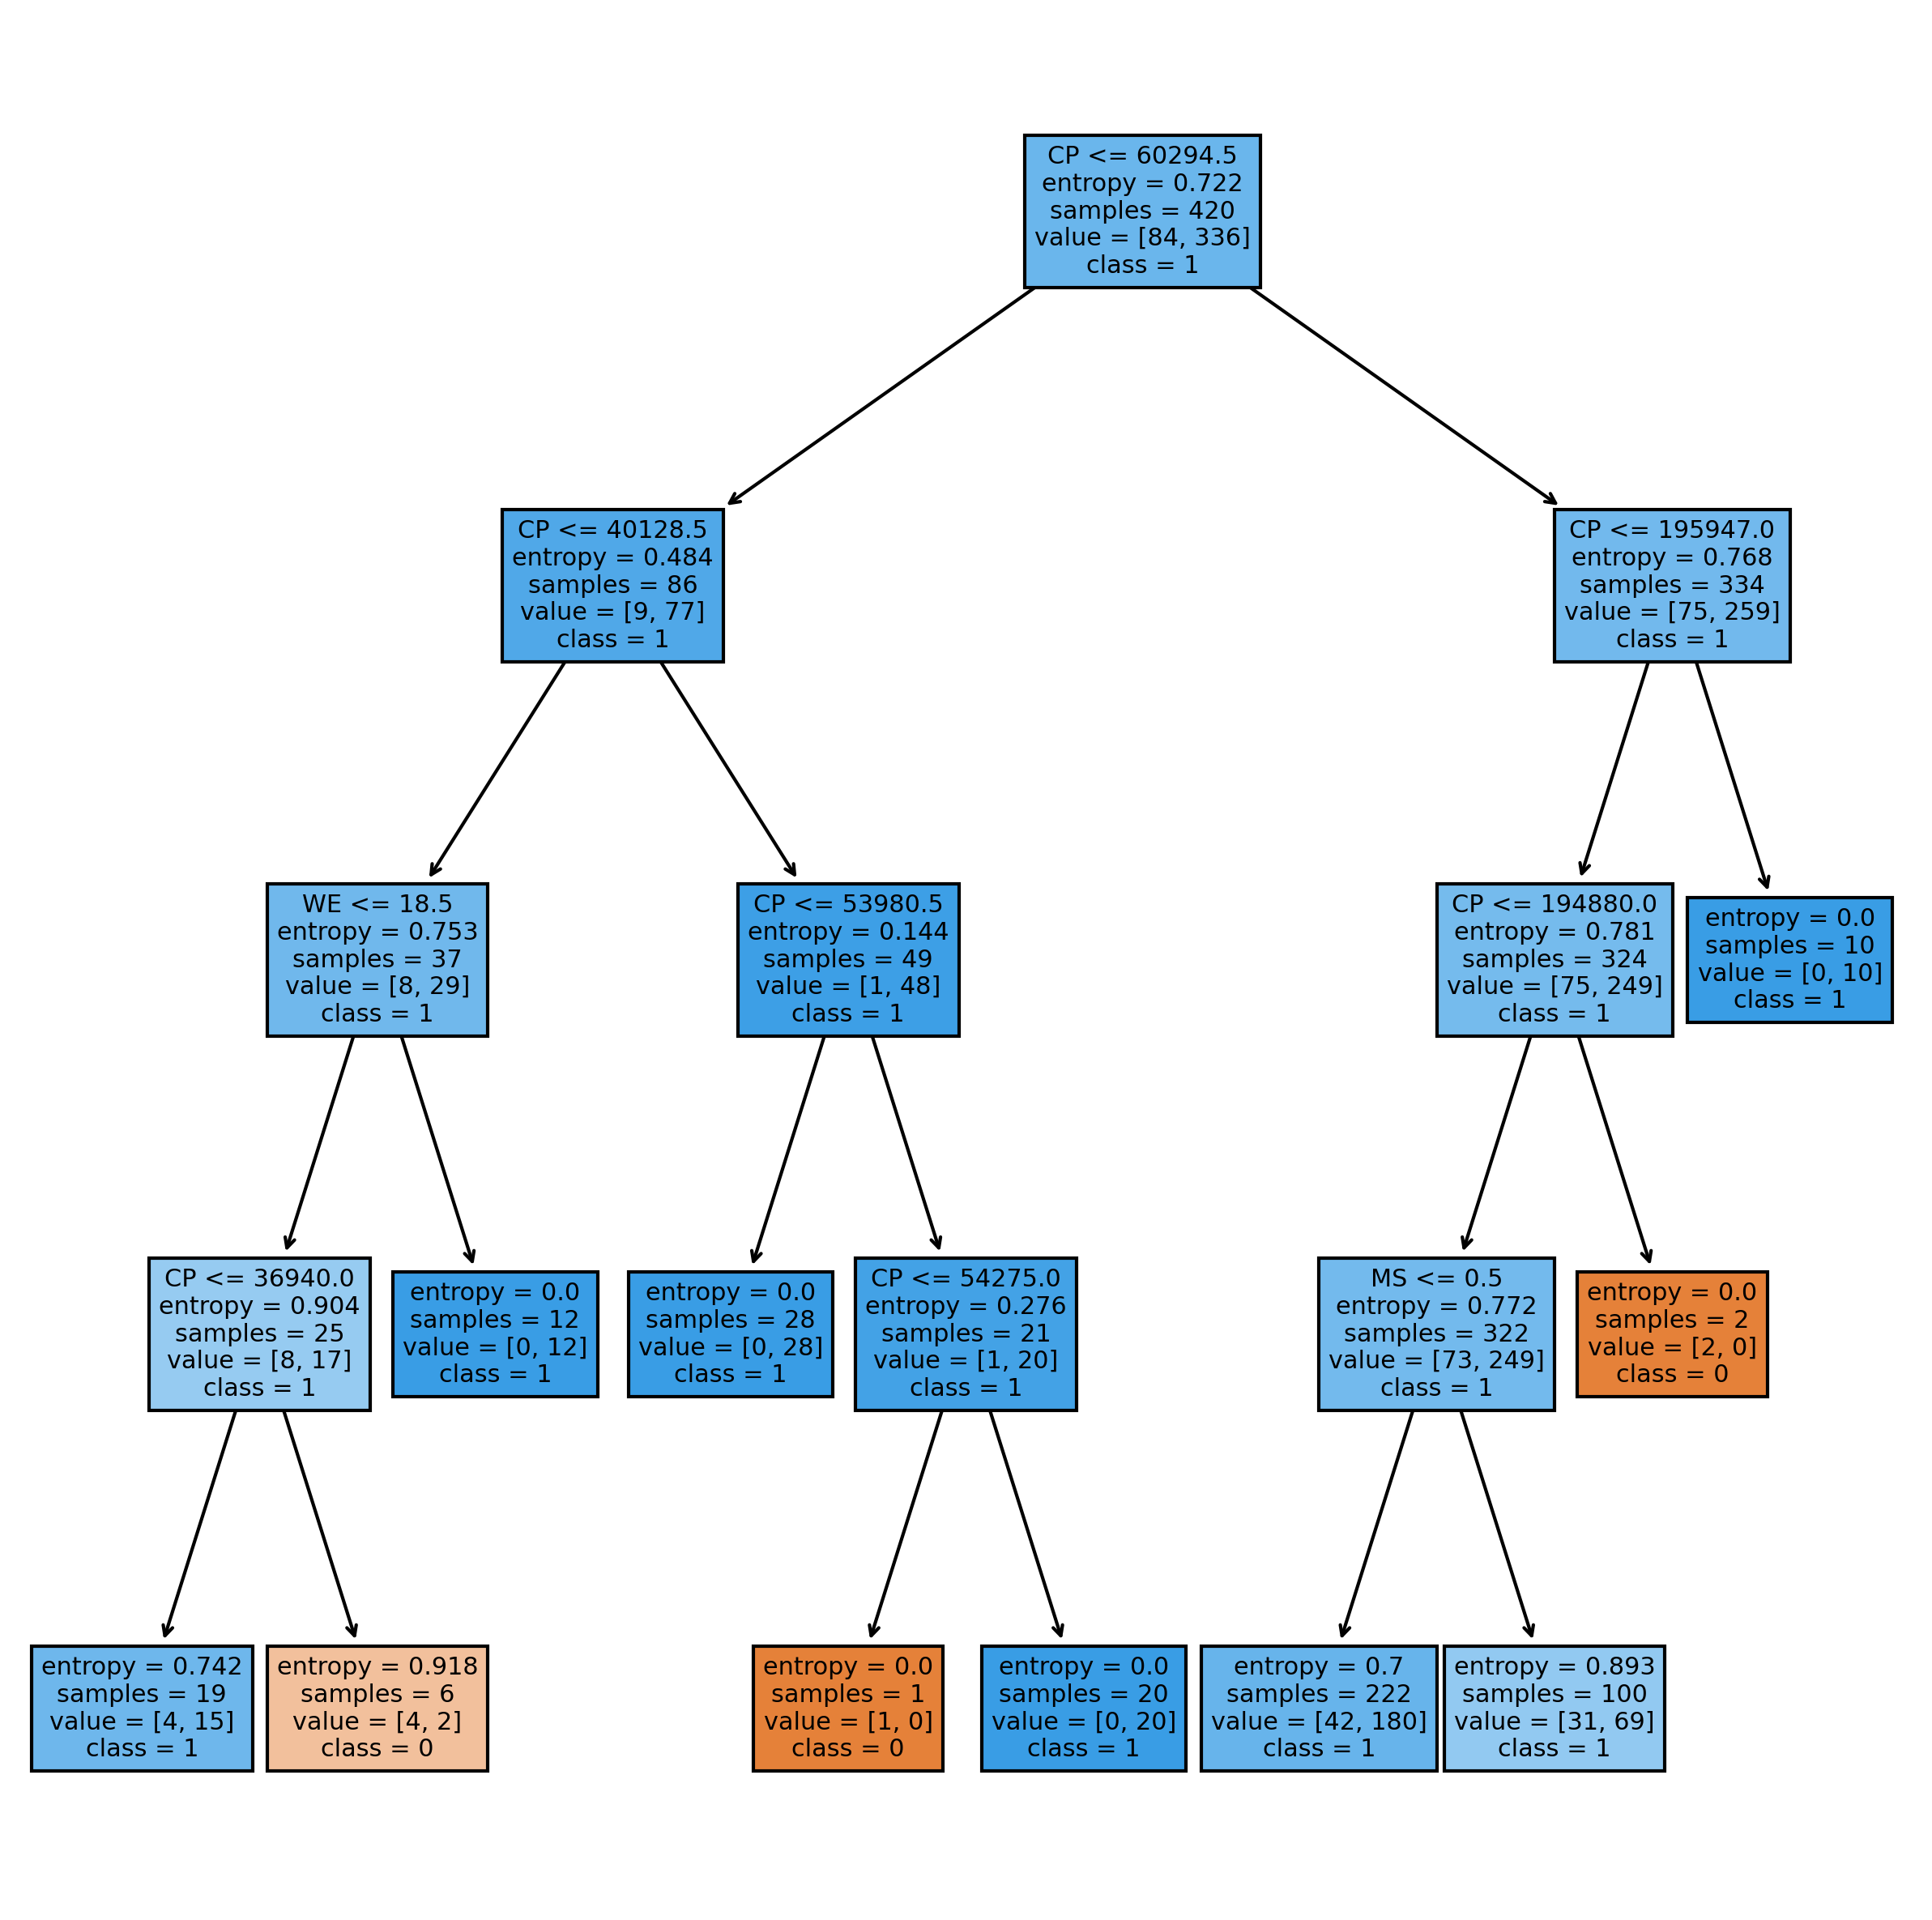

In [36]:
fn=['MS','Undergrad','CP','WE','Urban']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)    
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [37]:
y_pred_train= model.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 81.19047619047619
[[  7  77]
 [  2 334]]


In [38]:
y_pred_test=model.predict(x_test)
acc=accuracy_score(y_test, y_pred_test)*100
print("Accuracy=", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy= 76.11111111111111
[[  0  40]
 [  3 137]]


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
xscaled=scaler.fit_transform(x)
xscaled

array([[-0.6912543 , -1.040833  , -1.17852072, -0.62914254,  0.99335541],
       [-0.6912543 ,  0.96076892,  0.50850002,  0.27636996,  0.99335541],
       [ 1.4466456 , -1.040833  ,  1.03310911,  1.63463872,  0.99335541],
       ...,
       [-0.6912543 , -1.040833  ,  0.90969648, -1.76103318,  0.99335541],
       [ 1.4466456 ,  0.96076892,  1.43219749,  0.1631809 , -1.00668904],
       [-0.6912543 , -1.040833  ,  0.9915901 ,  0.04999184, -1.00668904]])

In [42]:
df2=pd.DataFrame(xscaled,columns=fclabel.columns[1:])
df2

,MS,Undergrad,CP,WE,Urban
0,-0.691254,-1.040833,-1.178521,-0.629143,0.993355
1,-0.691254,0.960769,0.508500,0.276370,0.993355
2,1.446646,-1.040833,1.033109,1.634639,0.993355
3,-0.691254,0.960769,1.696831,-0.063197,0.993355
4,1.446646,-1.040833,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,-0.691254,0.960769,-1.390432,-0.968710,0.993355
596,-0.691254,0.960769,-1.071672,-1.534655,0.993355
597,-0.691254,-1.040833,0.909696,-1.761033,0.993355
598,1.446646,0.960769,1.432197,0.163181,-1.006689


In [43]:
X=df1.iloc[:,:]
Y=fclabel.iloc[:,0]

In [44]:
X


,Taxable.Income,Marital.Status,Undergrad,City.Population,Work.Experience,Urban
0,68833,Single,NO,50047,10,YES
1,33700,Divorced,YES,134075,18,YES
2,36925,Married,NO,160205,30,YES
3,50190,Single,YES,193264,15,YES
4,81002,Married,NO,27533,28,NO
...,...,...,...,...,...,...
595,76340,Divorced,YES,39492,7,YES
596,69967,Divorced,YES,55369,2,YES
597,47334,Divorced,NO,154058,0,YES
598,98592,Married,YES,180083,17,NO


In [45]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TI, Length: 600, dtype: int64

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [47]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(420, 6) (180, 6) (420,) (180,)


In [48]:
####Now building model on standardised 

In [53]:
stdmodel=DecisionTreeClassifier(criterion = 'entropy',max_depth=4,max_features='sqrt')
stdmodel.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt')

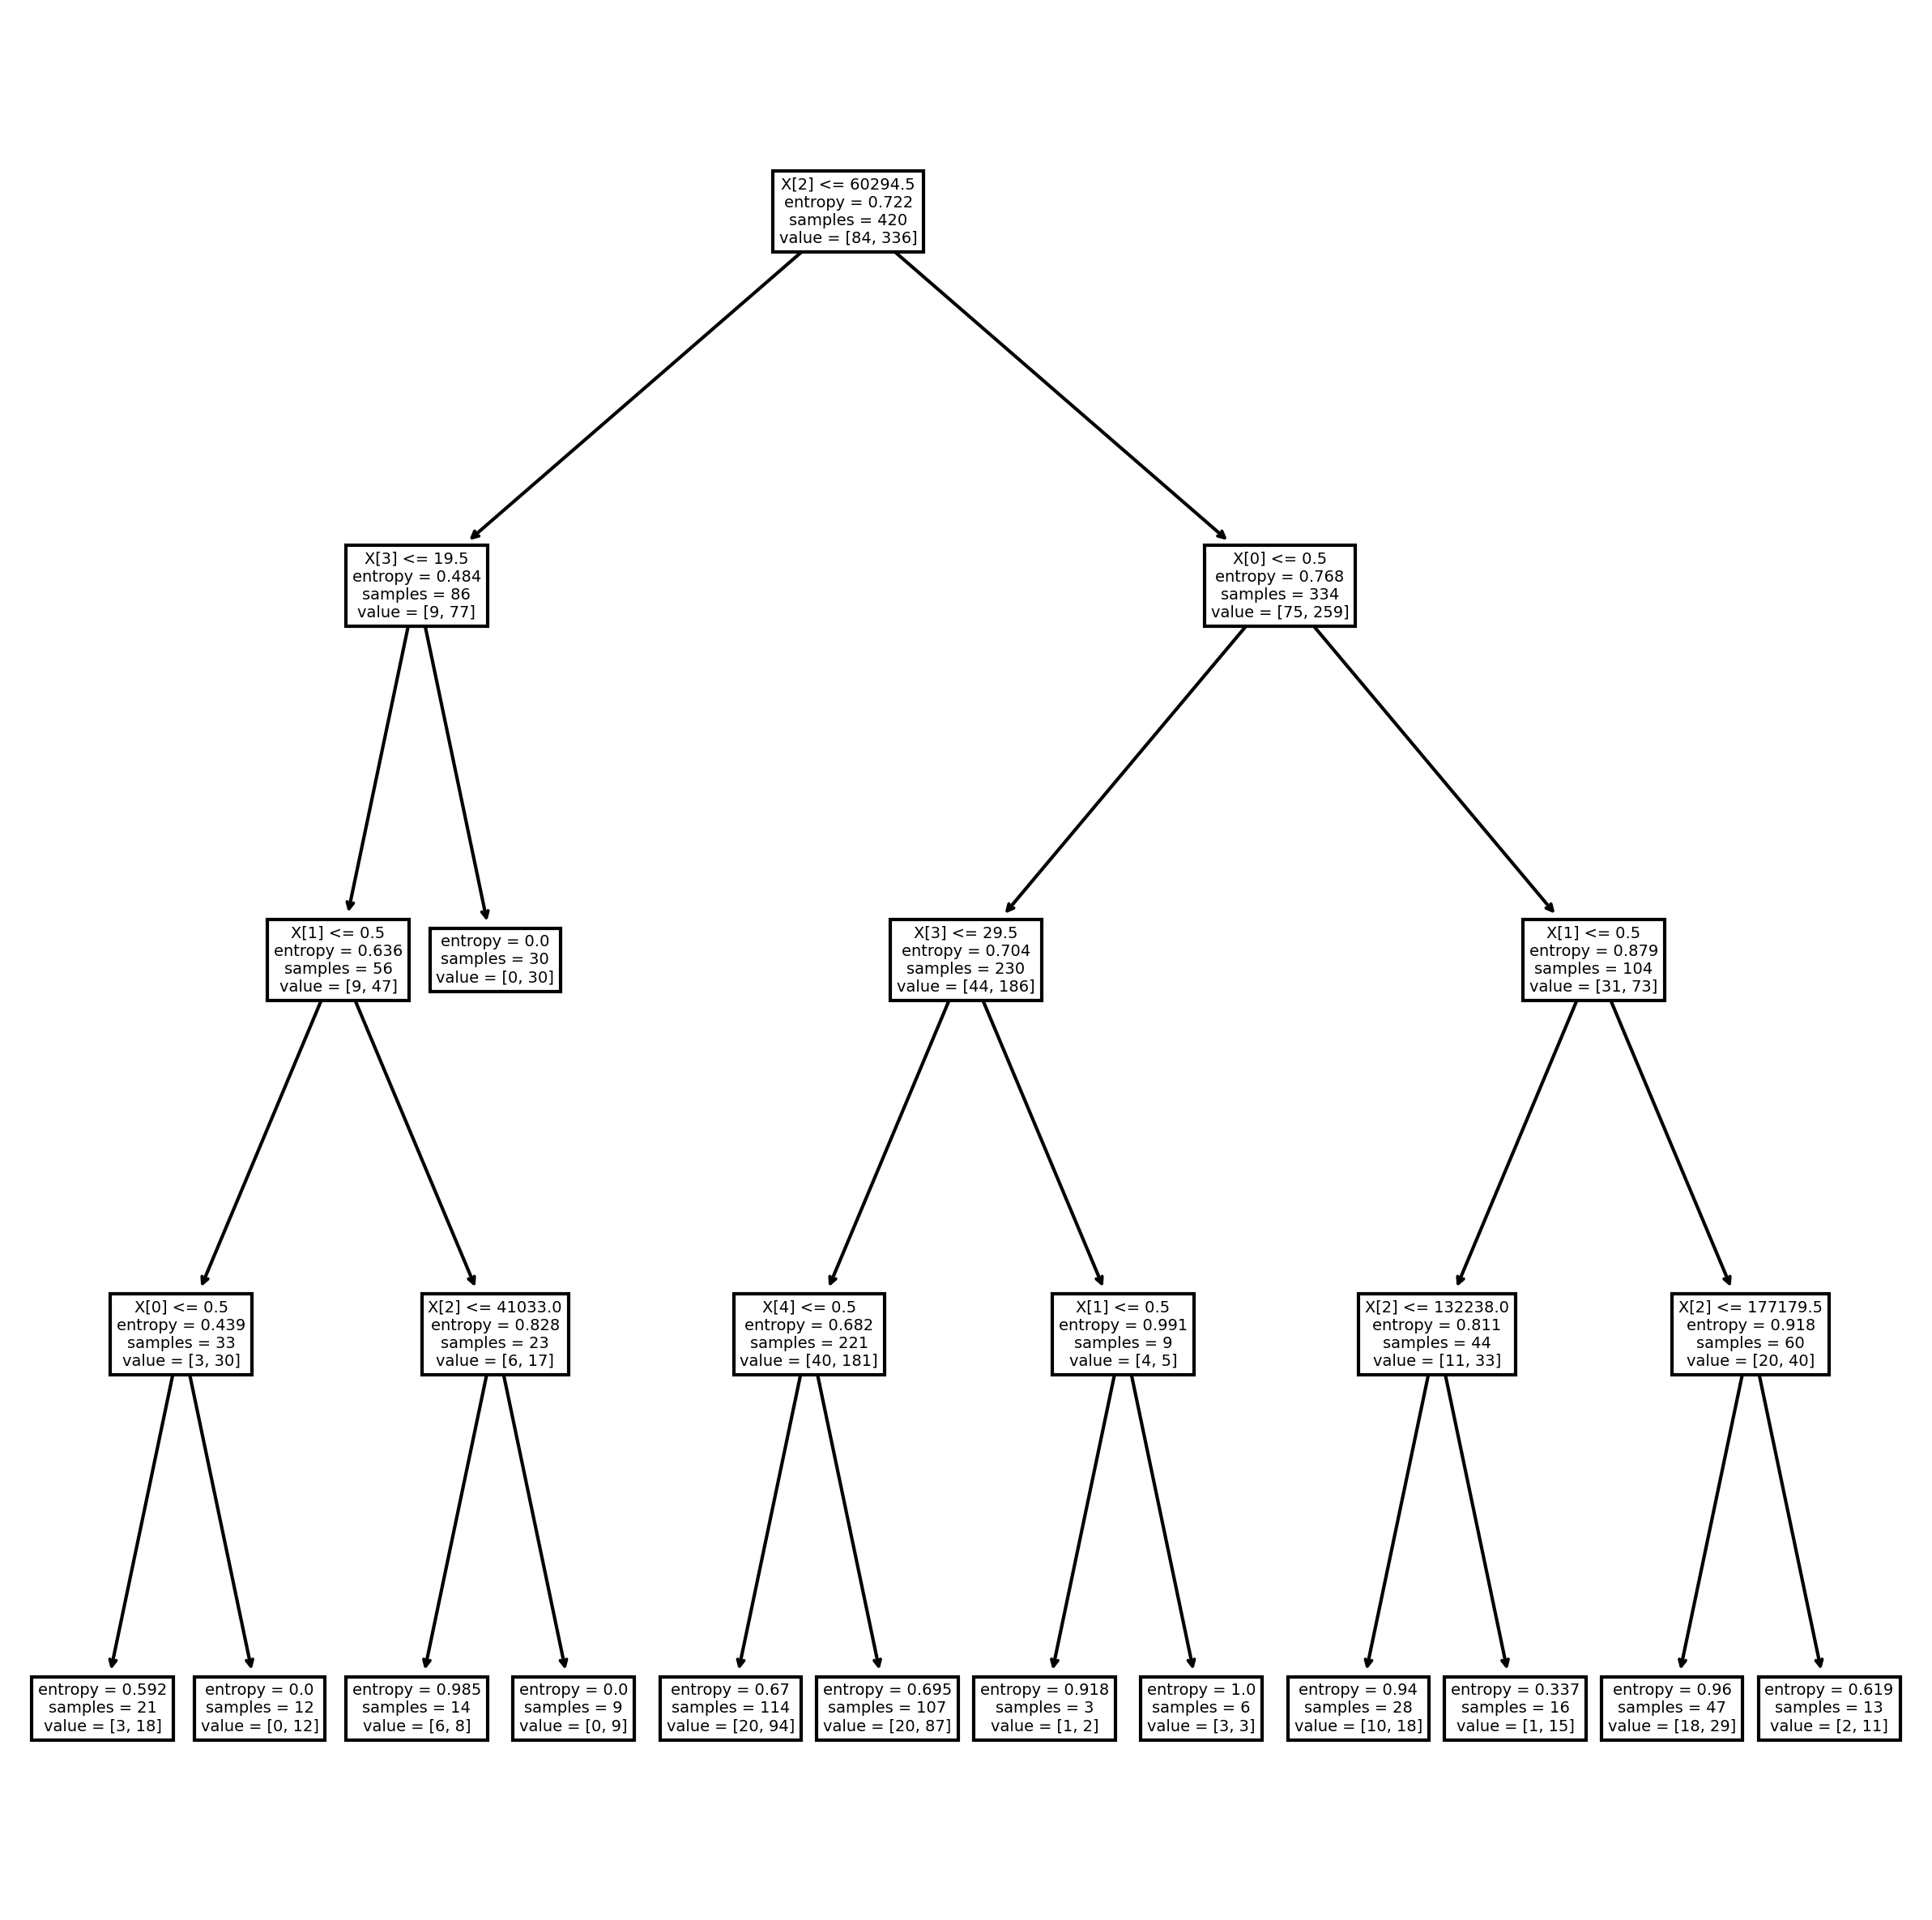

In [54]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(stdmodel);

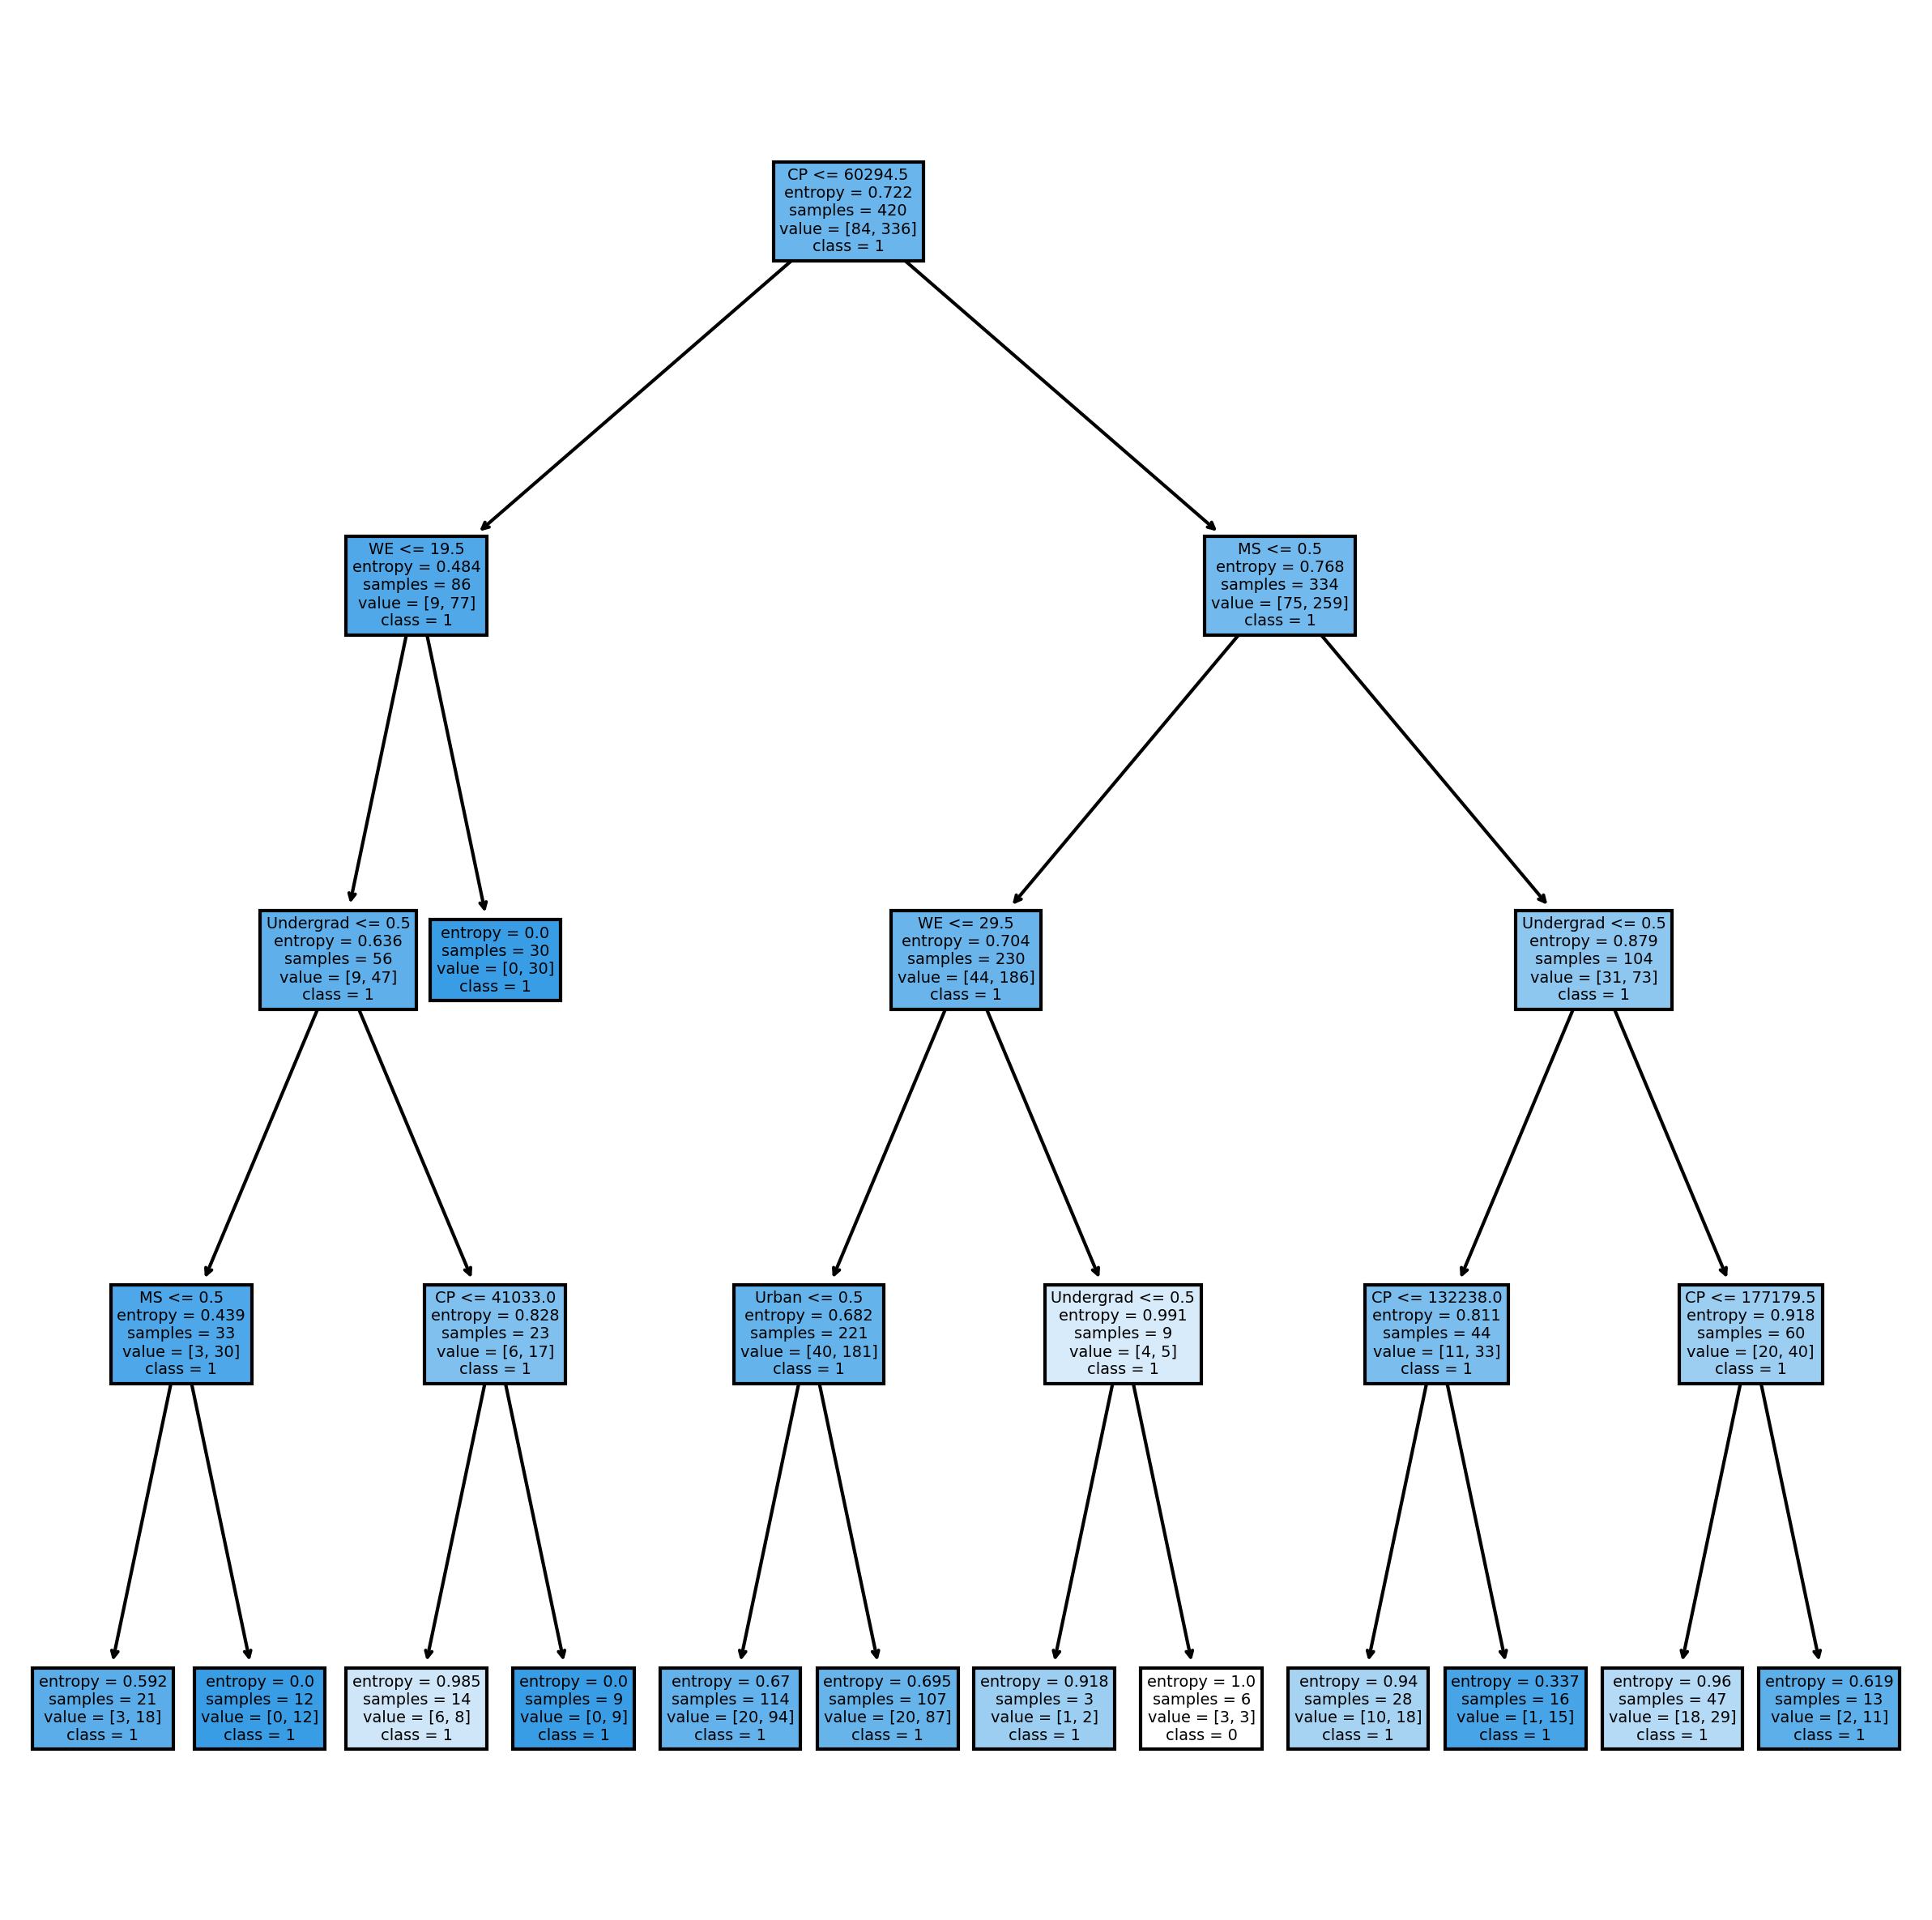

In [55]:
fn=['MS','Undergrad','CP','WE','Urban']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)    
tree.plot_tree(stdmodel,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [57]:
Y_pred_train= stdmodel.predict(x_train)
acc = accuracy_score(Y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 81.19047619047619
[[  7  77]
 [  2 334]]


In [59]:
Y_pred_test=stdmodel.predict(x_test)
acc=accuracy_score(y_test, y_pred_test)*100
print("Accuracy=", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy= 76.11111111111111
[[  0  40]
 [  3 137]]


In [ ]:
##### Building Decision Tree classifier using gini criteria

In [60]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4,max_features='sqrt')

In [61]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt')

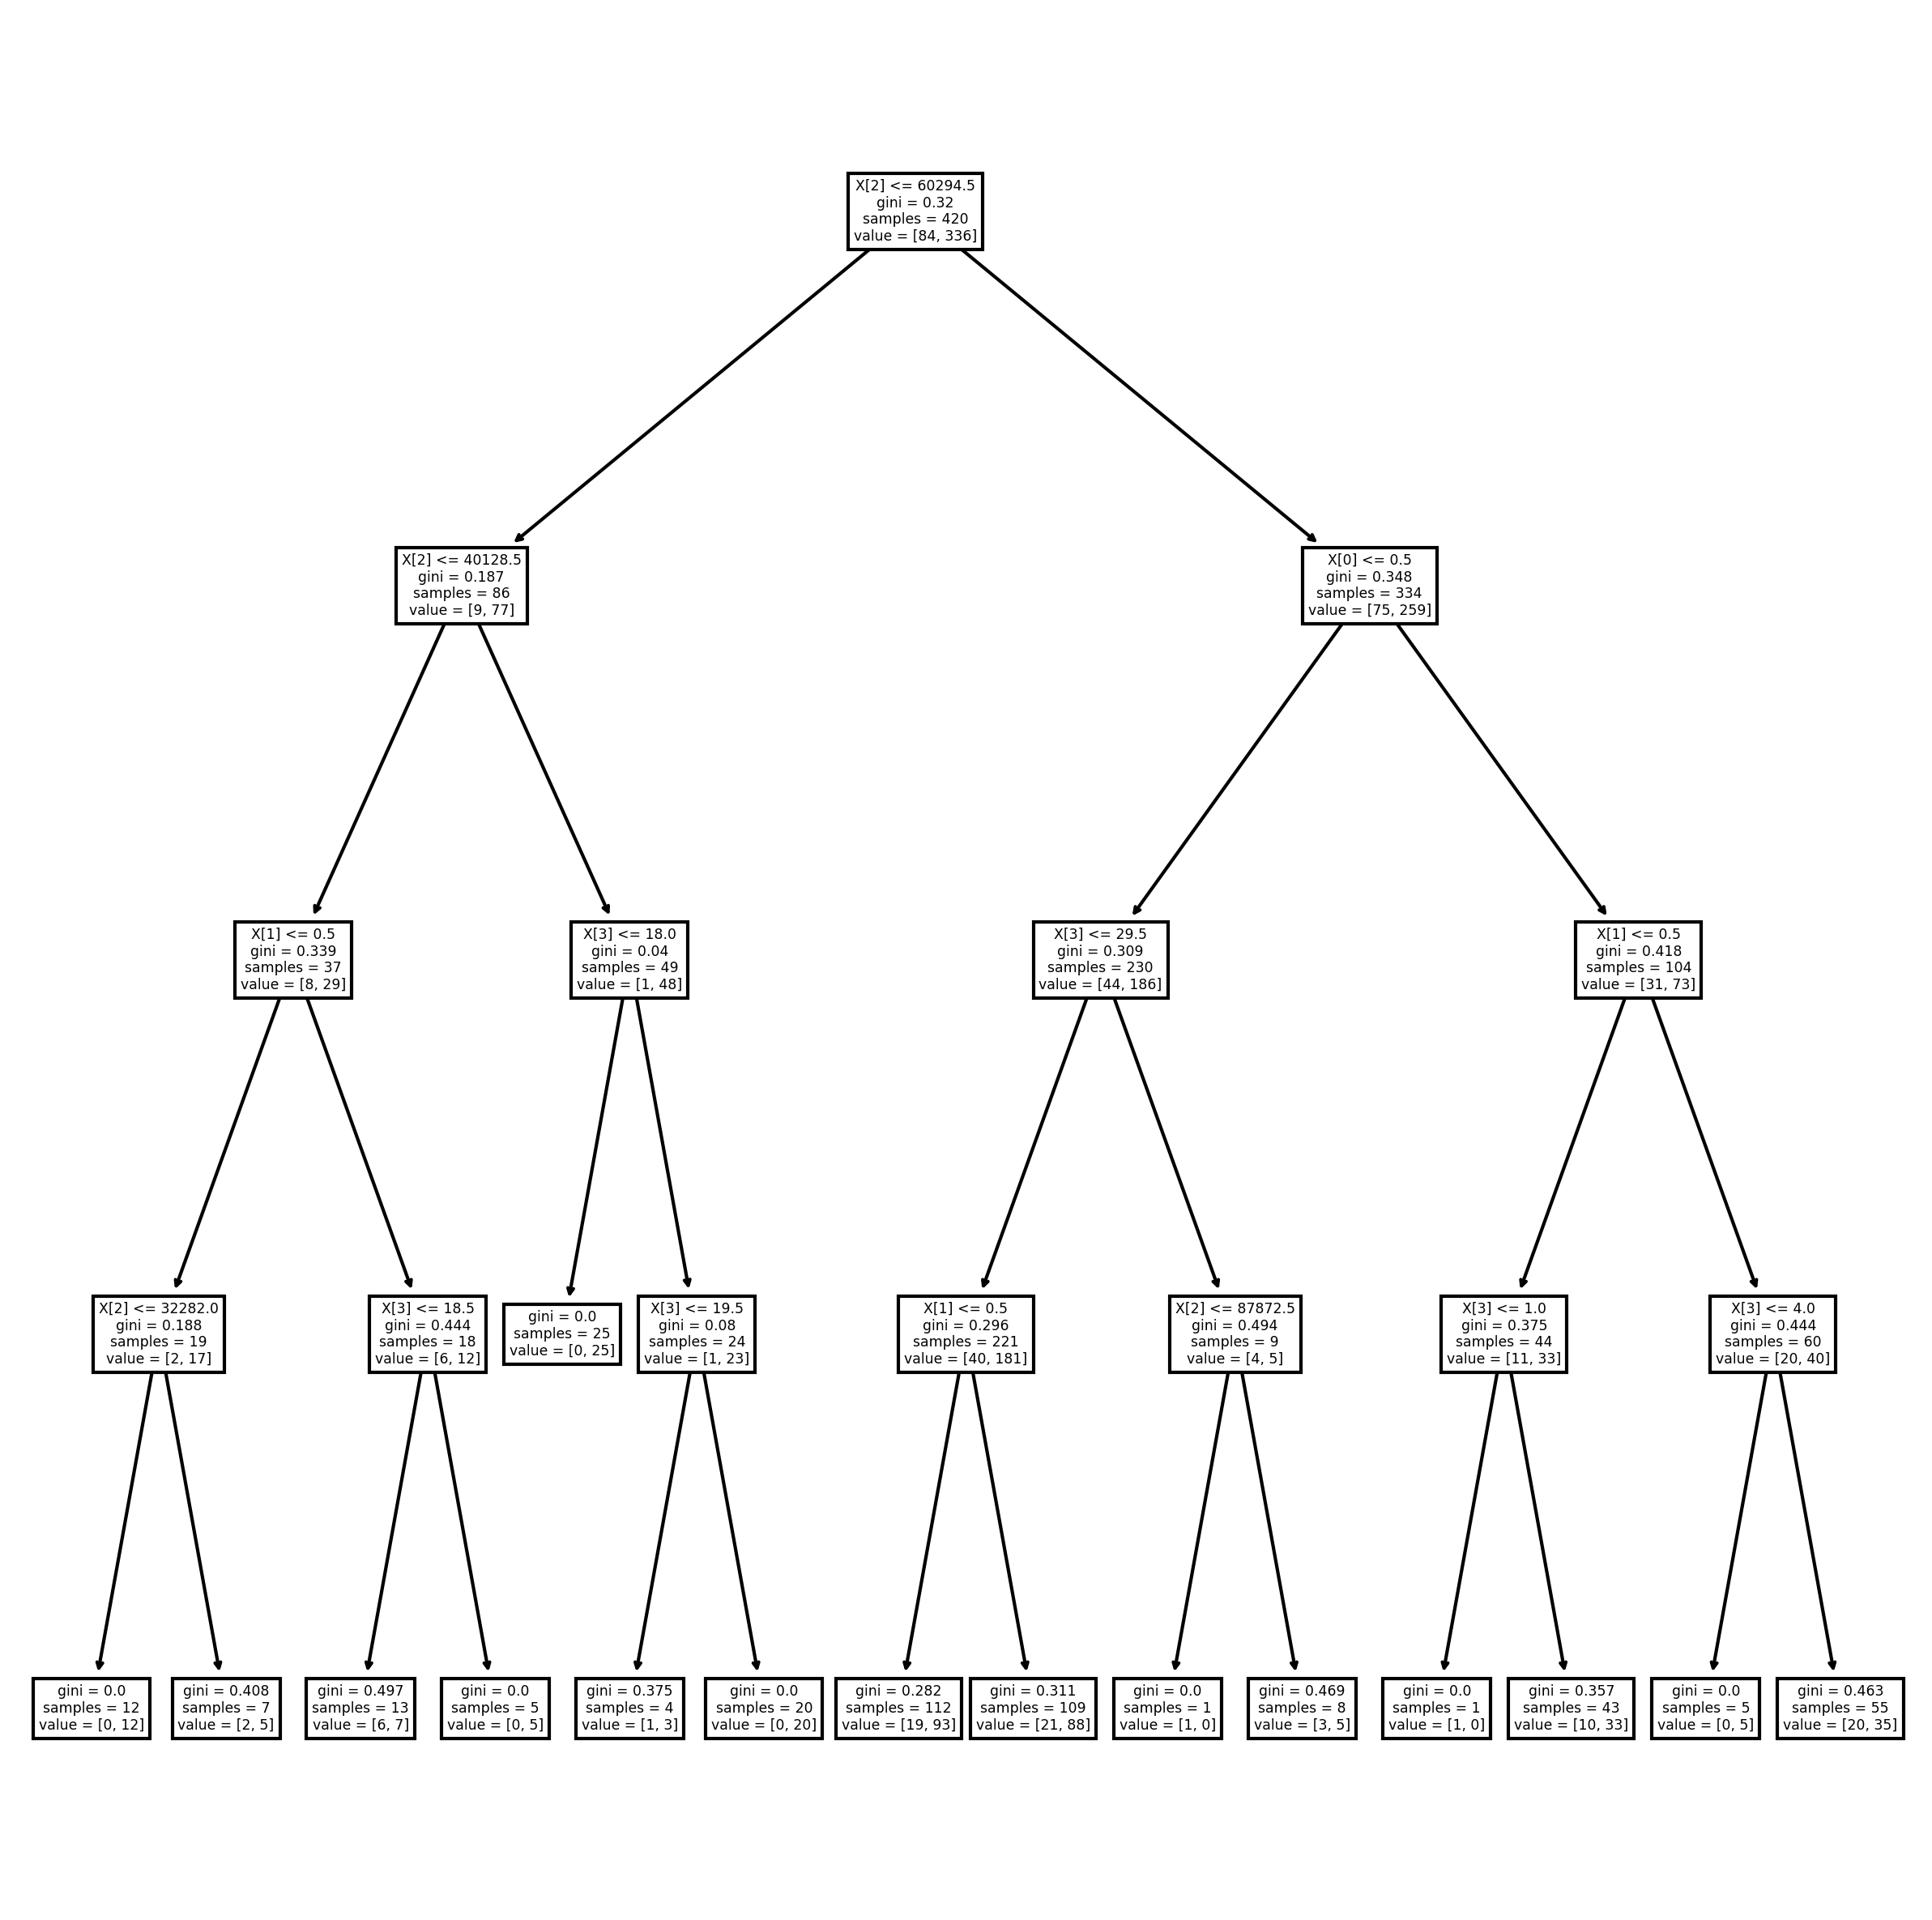

In [62]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model_gini);

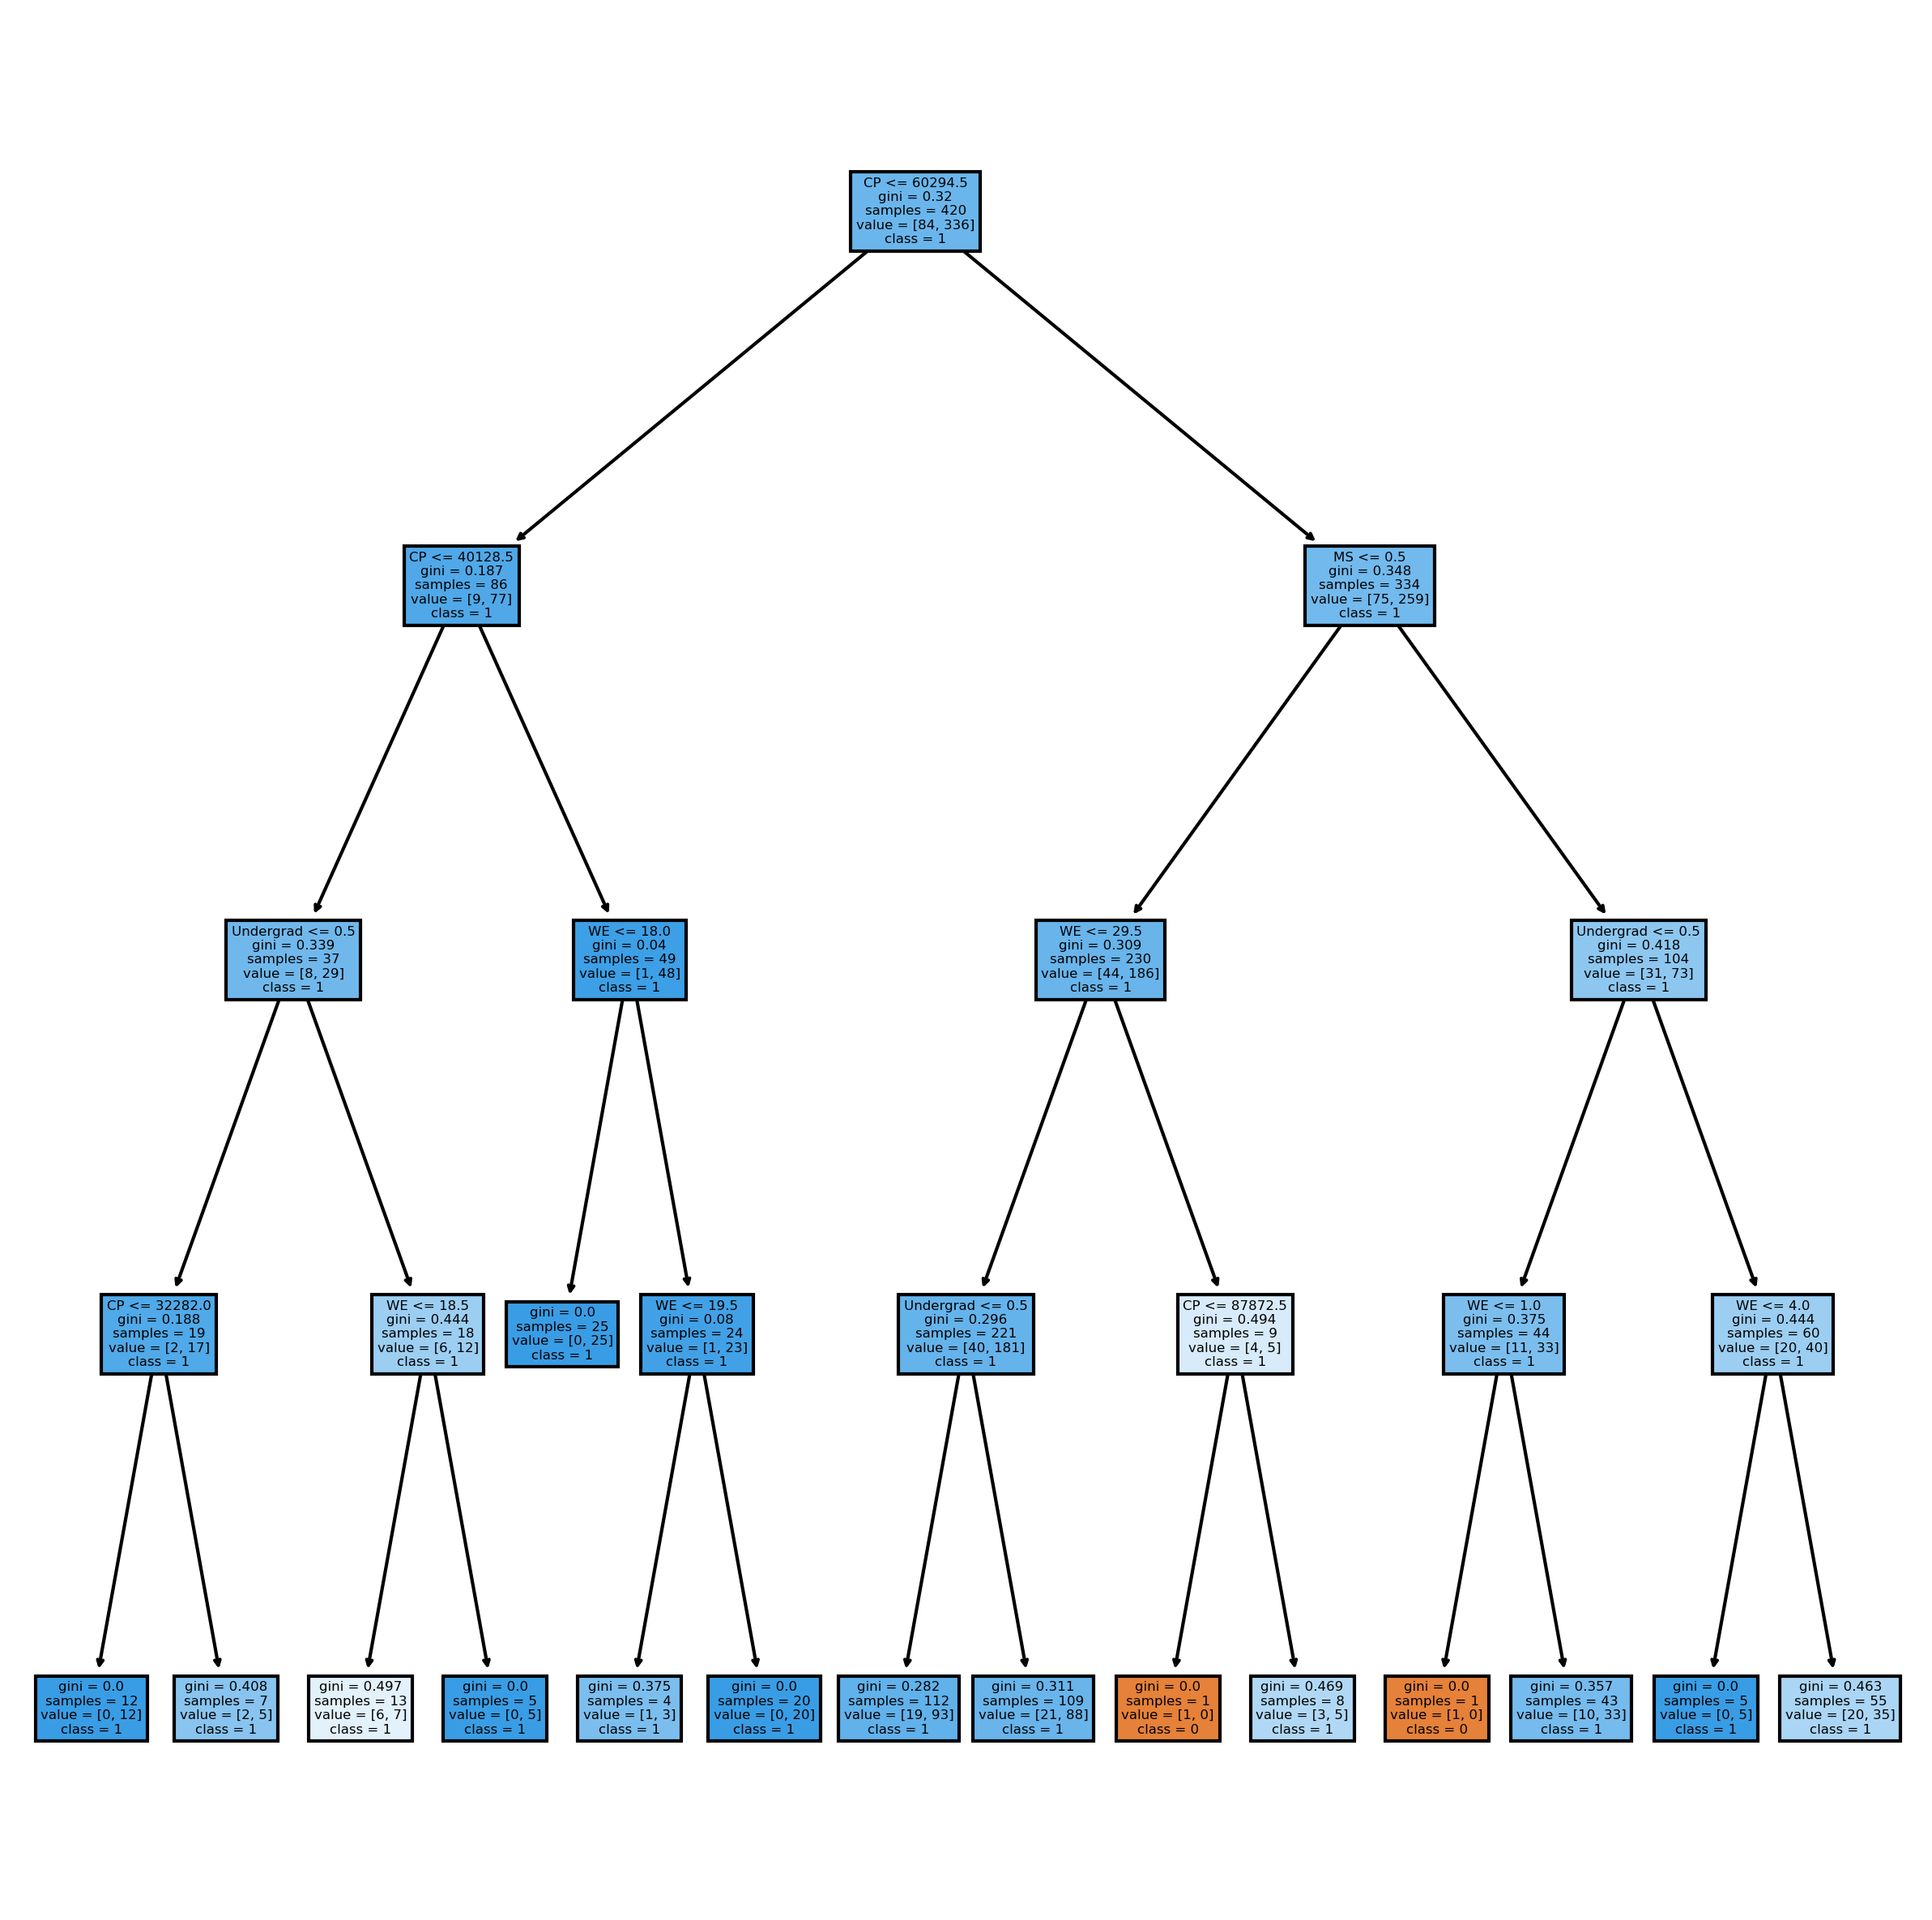

In [63]:
fn=['MS','Undergrad','CP','WE','Urban']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)    
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [64]:
y_pred_train_gini= model_gini.predict(x_train)
acc = accuracy_score(y_train, y_pred_train_gini) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train_gini))

Accuracy = 80.47619047619048
[[  2  82]
 [  0 336]]


In [65]:
y_pred_test_gini=model_gini.predict(x_test)
acc=accuracy_score(y_test, y_pred_test_gini)*100
print("Accuracy=", acc)
print(confusion_matrix(y_test, y_pred_test_gini))

Accuracy= 77.22222222222223
[[  0  40]
 [  1 139]]


In [ ]:
### Now doing model on Standardised data

In [67]:
stdmodelgini=DecisionTreeClassifier(criterion = 'gini',max_depth=4)
stdmodelgini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

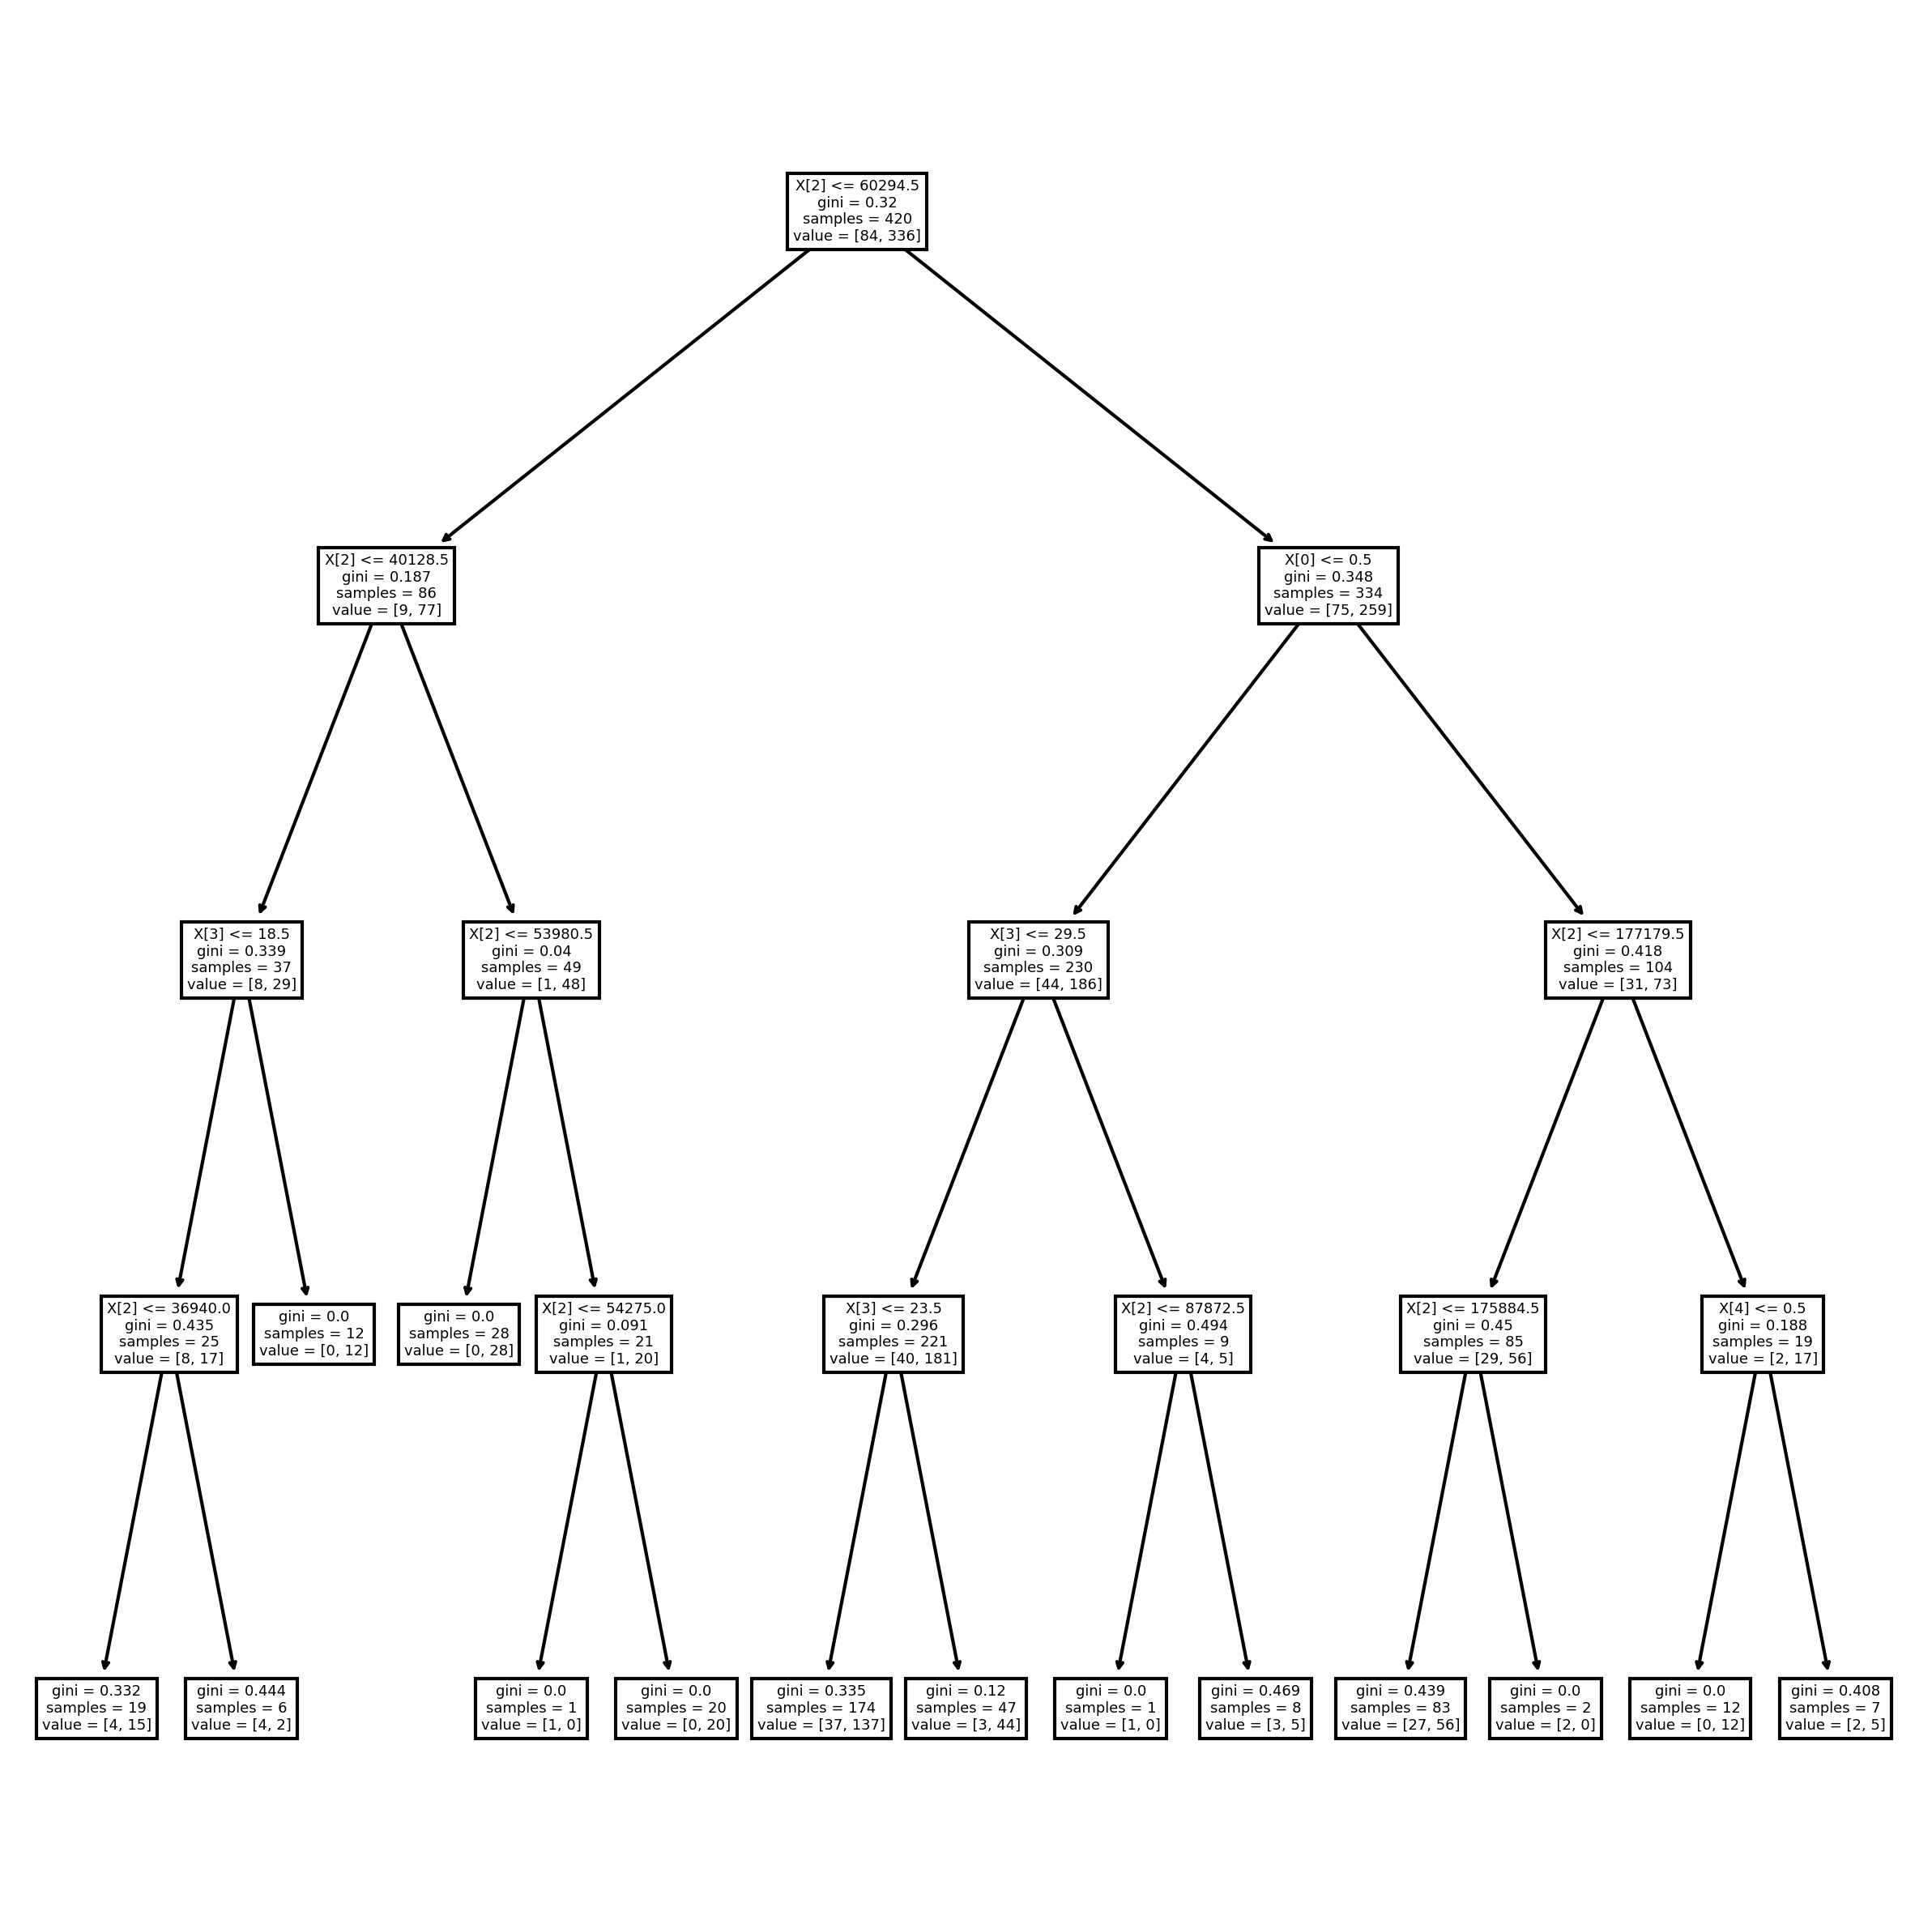

In [68]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(stdmodelgini);

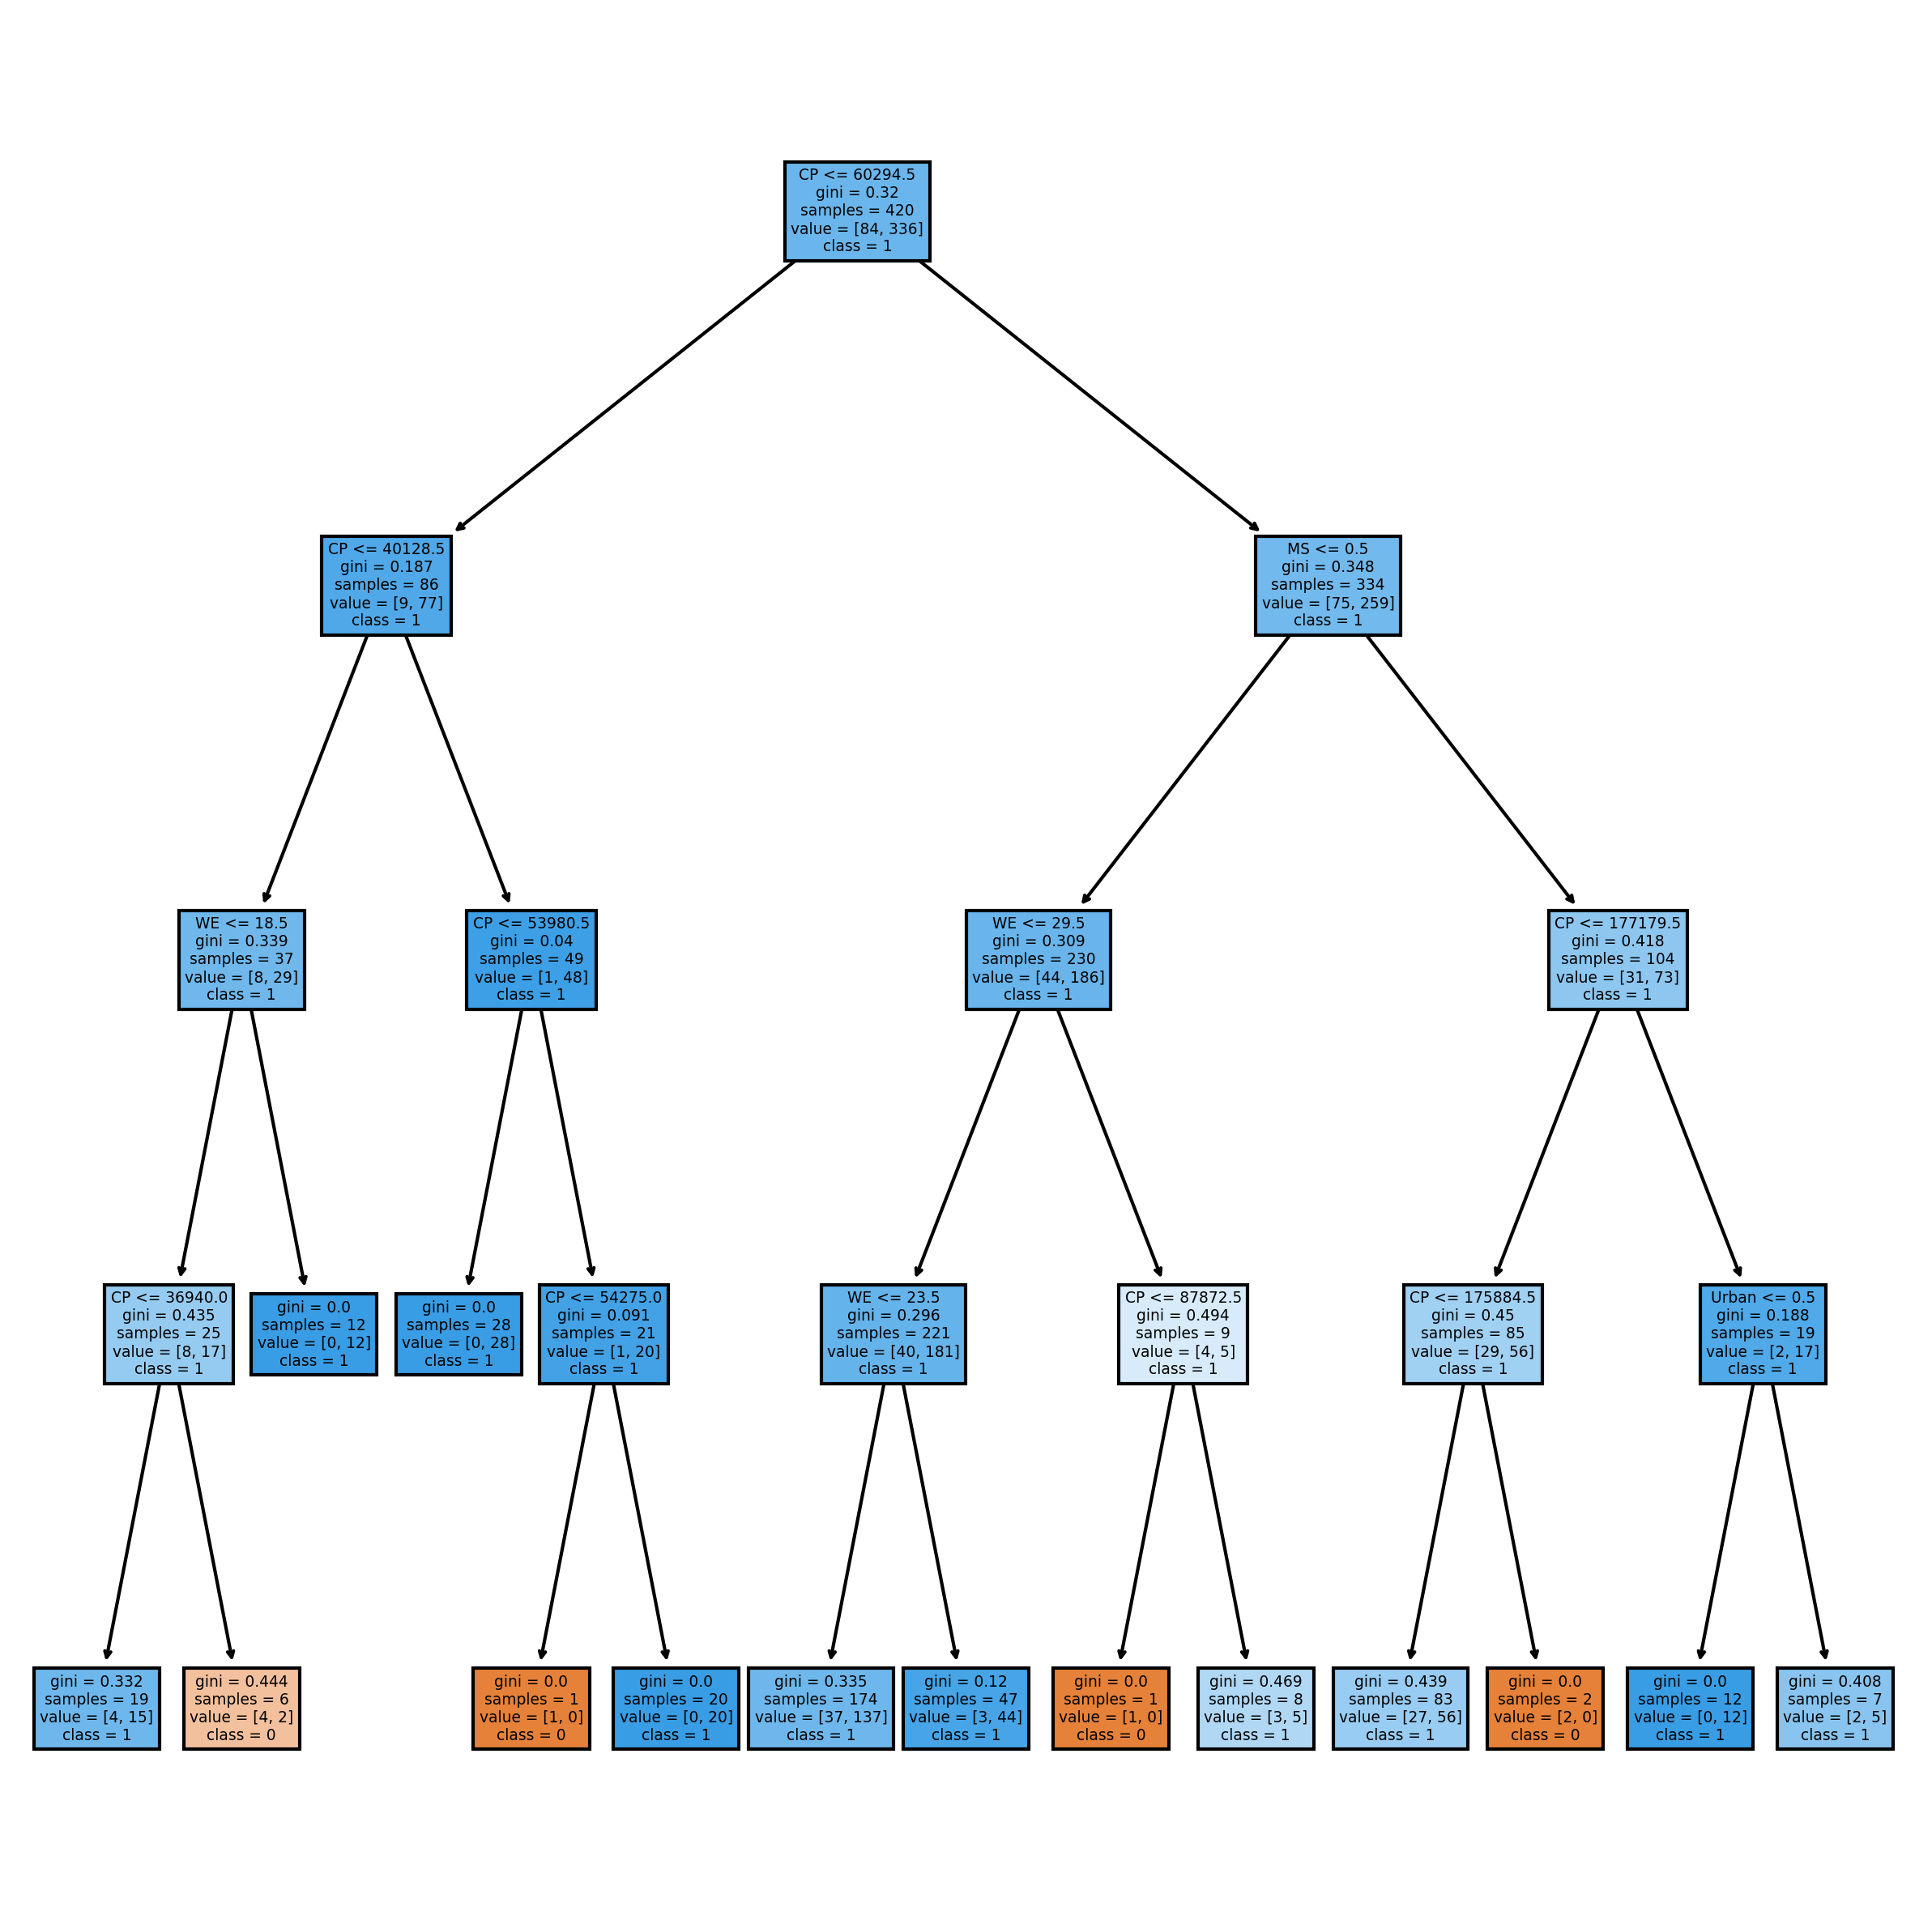

In [69]:
fn=['MS','Undergrad','CP','WE','Urban']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)    
tree.plot_tree(stdmodelgini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [73]:
y_pred_traingini= stdmodelgini.predict(x_train)
acc = accuracy_score(y_train, y_pred_traingini) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_traingini))

Accuracy = 81.42857142857143
[[  8  76]
 [  2 334]]


In [74]:
y_pred_testgini=stdmodelgini.predict(x_test)
acc=accuracy_score(y_test, y_pred_testgini)*100
print("Accuracy=", acc)
print(confusion_matrix(y_test, y_pred_testgini))

Accuracy= 76.66666666666667
[[  0  40]
 [  2 138]]
